In [1]:
%pylab inline
from scipy.ndimage import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy as sp

In [3]:
##############################################
#------ Task 1: Resizing all photos ---------#
##############################################
def fig_input(file_name, cmap = cm.Greys):
    tmp = imread(file_name, flatten = True)
    imshow(tmp, cmap)
    return tmp

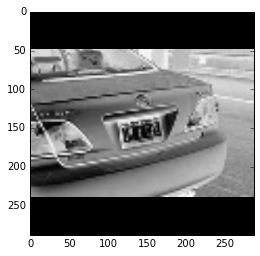

In [4]:
str1 = "Data/im2-1.png"
fig1 = fig_input(str1)

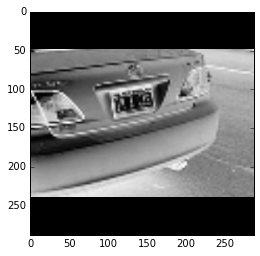

In [5]:
str2 = "Data/im2-2.png"
fig2 = fig_input(str2)

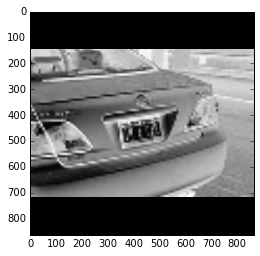

In [6]:
re_fig1 = sp.misc.imresize(fig1, 300)
imshow(re_fig1, cmap = cm.Greys)

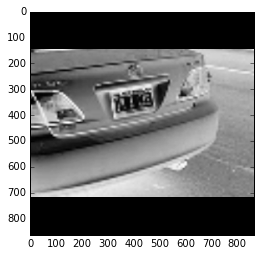

In [8]:
re_fig2 = sp.misc.imresize(fig2, 300)
imshow(re_fig2, cmap = cm.Greys)

In [11]:
from scipy import signal 
from scipy import misc

In [12]:
face = misc.face(gray=True) - misc.face(gray=True).mean()

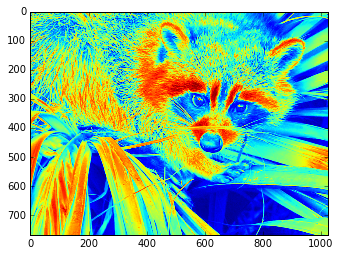

In [25]:
imshow(misc.face(gray = True))

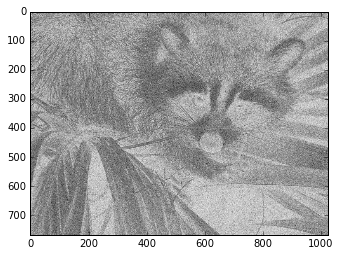

In [18]:
type(face)
imshow(face, cmap = cm.Greys)

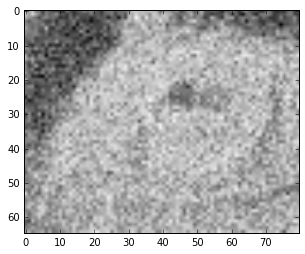

In [20]:
template = np.copy(face[300:365, 670:750])  # right eye
imshow(template, cmap = cm.Greys)

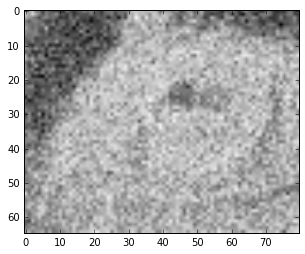

In [21]:
template -= template.mean()
imshow(template, cmap = cm.Greys)

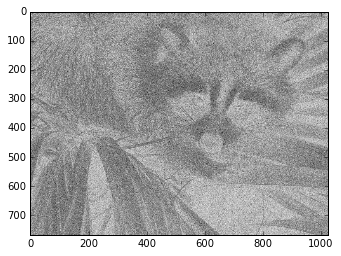

In [22]:
face = face + np.random.randn(*face.shape) * 50  # add noise
imshow(face, cmap = cm.Greys)

In [26]:
corr = signal.correlate2d(face, template, boundary='symm', mode='same')


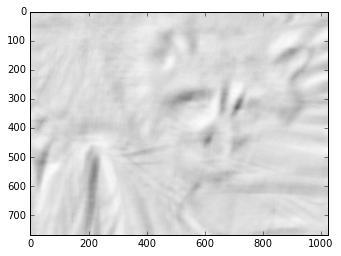

In [27]:
imshow(corr, cmap = cm.Greys)

In [28]:
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [29]:
import matplotlib.pyplot as plt

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


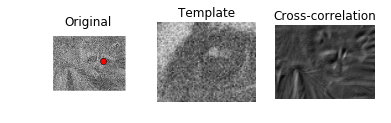

In [31]:
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3)
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

In [32]:
import numpy
import cv

#Create a random template and place it in a larger image
templateNp = numpy.random.random( (100,100) )
image = numpy.random.random( (400,400) )
image[:100, :100] = templateNp

#create a numpy array for storing result
resultNp = numpy.zeros( (301, 301) )

#convert from numpy format to openCV format
templateCv = cv.fromarray(numpy.float32(template))
imageCv = cv.fromarray(numpy.float32(image))
resultCv =  cv.fromarray(numpy.float32(resultNp))

#perform cross correlation
cv.MatchTemplate(templateCv, imageCv, resultCv, cv.CV_TM_CCORR_NORMED)

#convert result back to numpy array
resultNp = np.asarray(resultCv)


ImportError: No module named 'cv'

In [33]:
signal.correlate2d?